In [200]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [201]:
import matplotlib as mpl
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi']=400
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

In [202]:
# Time dependent language shift
colours = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','C5','C6','C7','C8']

def time_dep_shift(t,x):
	return s_t(t)*x**a0*(1-x)-(1-s_t(t))*(1-x)**a0*x

def plot_shift(solution,label='Numerical solution'):
    plt.plot(solution.t, solution.y[0], linestyle='--', label=label,lw=1,c='black')
    return


# Time span parameters
t_span = (0, 100)  # Simulate for t between 0 and 100
t_eval = np.linspace(*t_span, 500)  # Time points where we want the solution

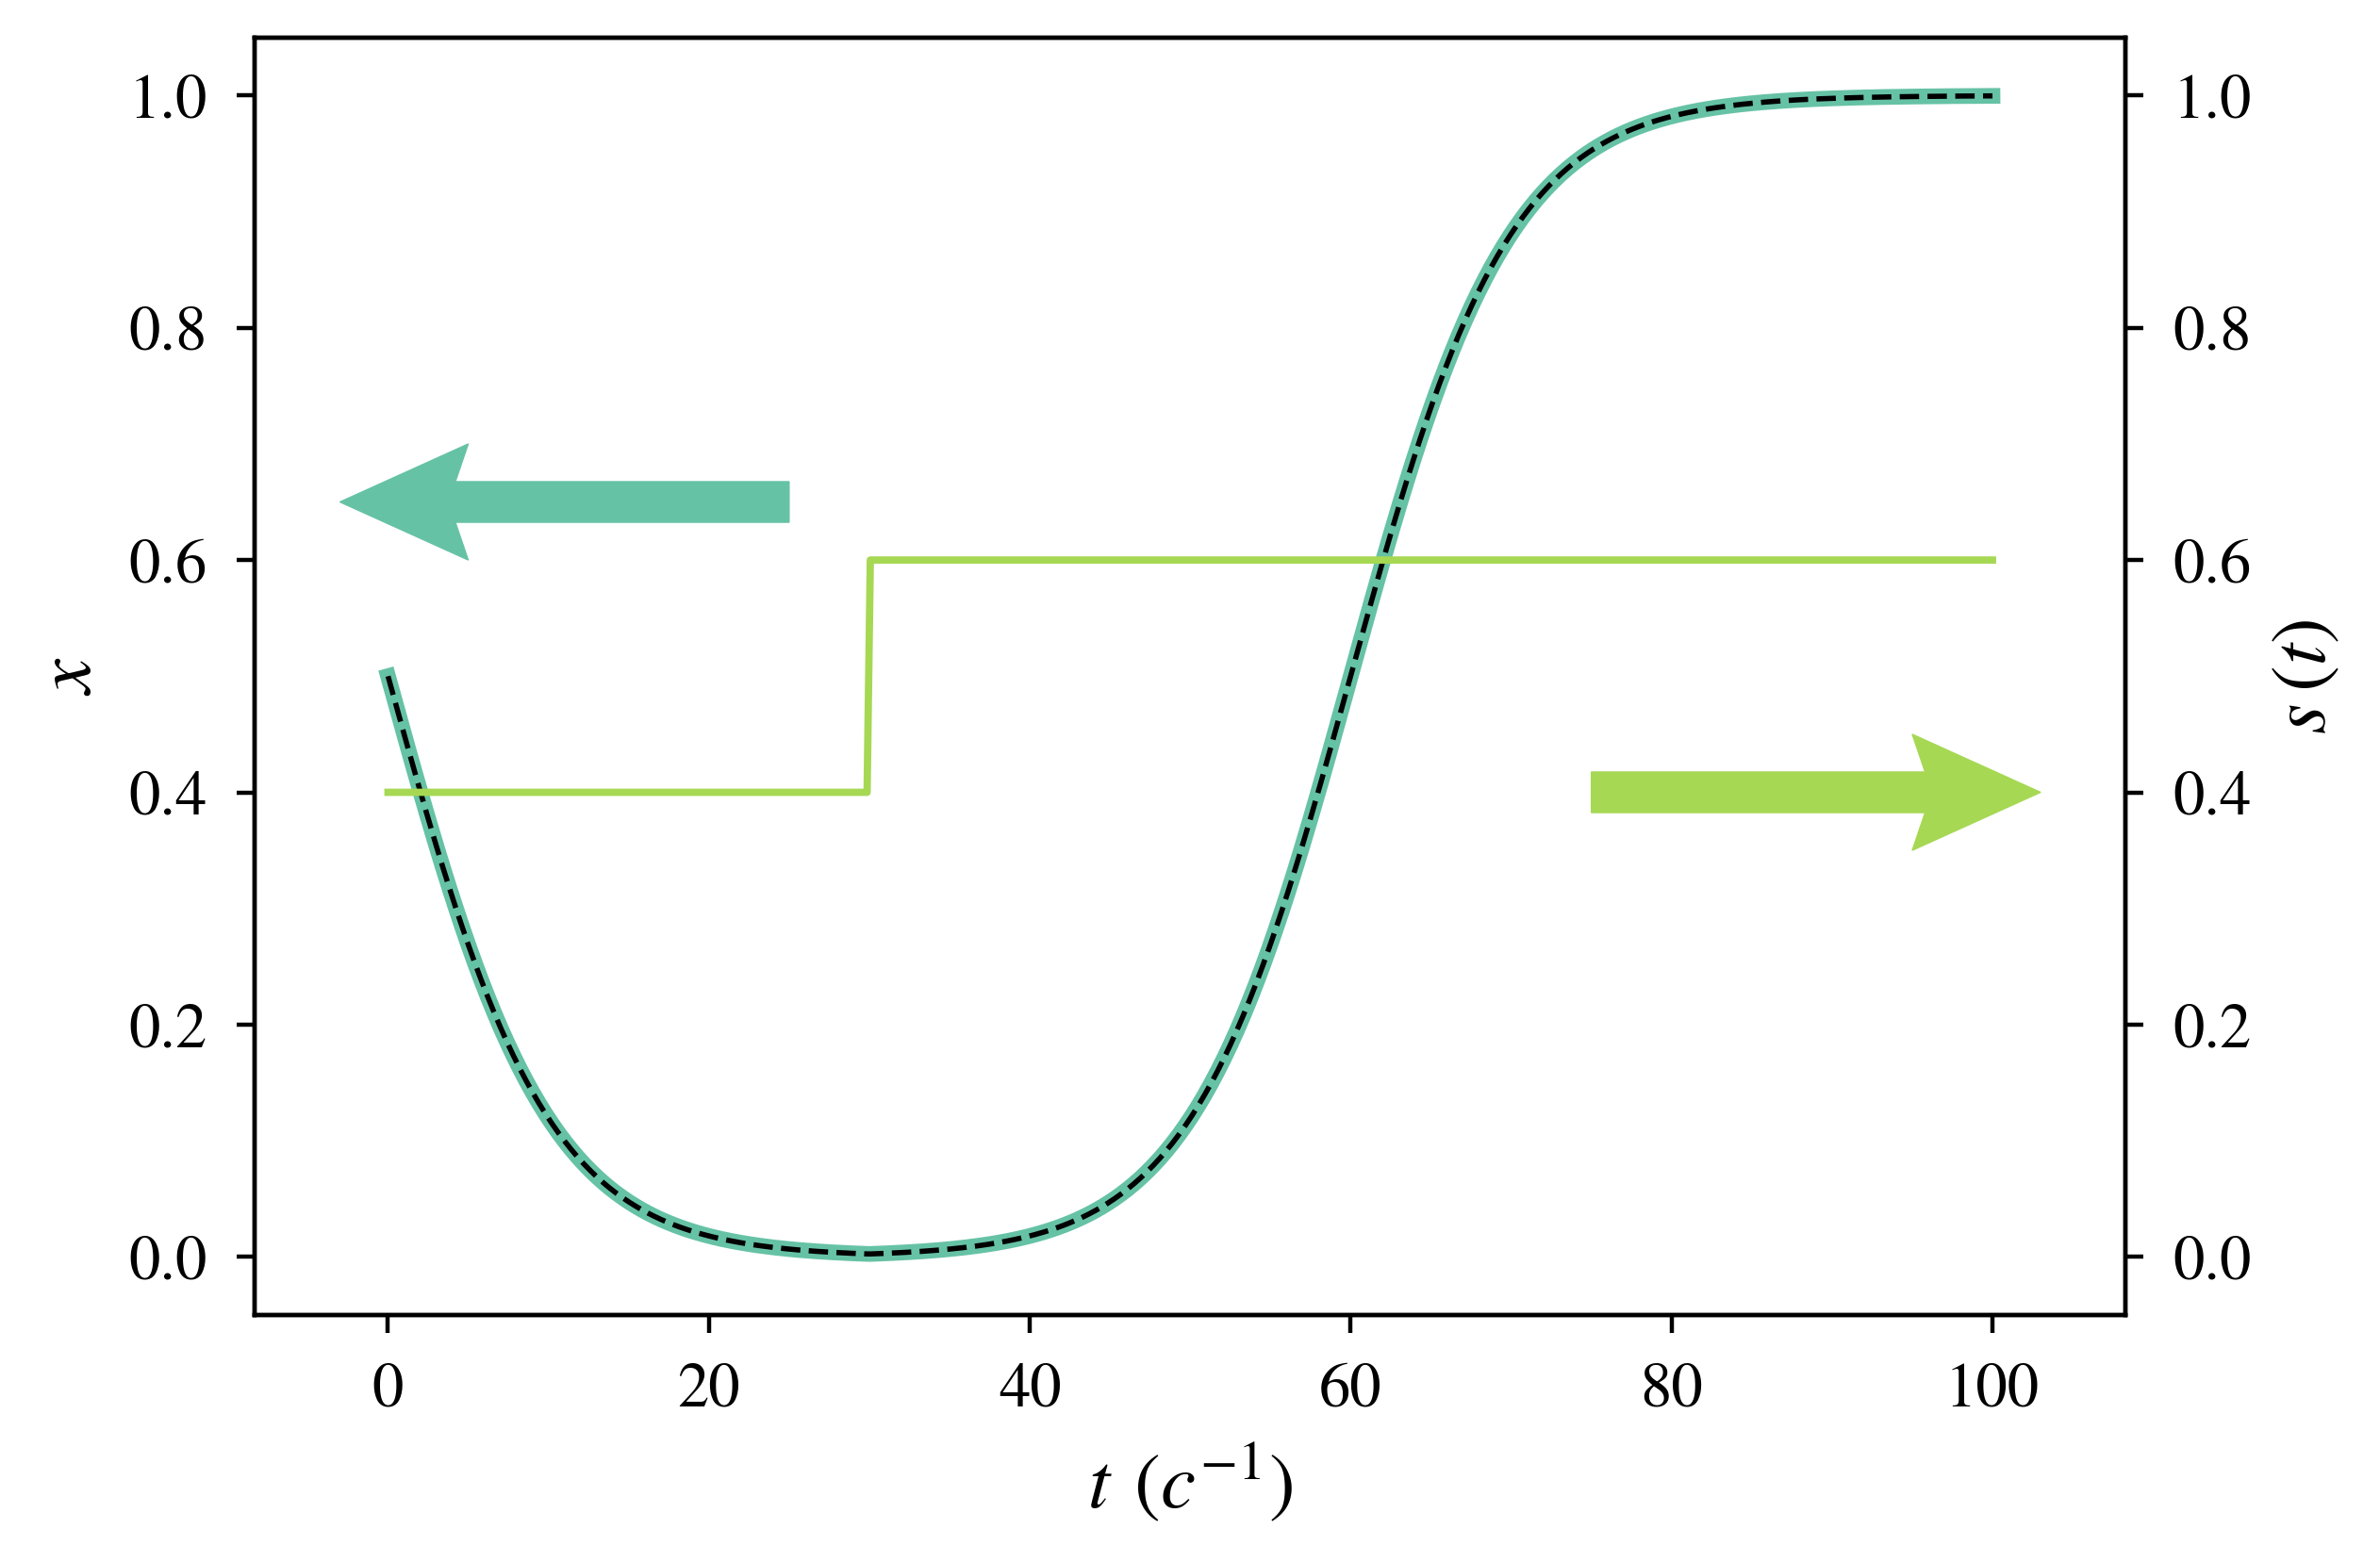

In [253]:
t_change =30
x0 = 0.5
s0,s1 = 0.4,0.6
a0 = 1

def f(t):
    if t<t_change: return 1/((1-x0)/x0*np.exp(-(2*s0-1)*t)+1)
    else: return 1/((1-x0)/x0*np.exp((-2*s0+1)*t_change-(2*s1-1)*(t-t_change))+1)
def s_t(t):
    if t<t_change: s_t = s0
    else: s_t = s1
    return s_t

f_t = np.vectorize(f)
st = np.vectorize(s_t)


fig, ax1 = plt.subplots()

ax1.plot(t_eval,f_t(t_eval),lw=3,c='#66c2a5')
solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval,method='DOP853')
ax1.plot(solution.t, solution.y[0], linestyle='--',lw=1,c='black')
ax1.set_xlabel('$t\:\:(c^{-1})$')
ax1.set_ylabel('$x$')
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax1.arrow(x=25,y=0.65, dx=-20,dy=0,edgecolor='#66c2a5',facecolor='#66c2a5', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.arrow(x=75,y=0.4 , dx=20 ,dy=0,edgecolor='#a6d854',facecolor='#a6d854', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.plot(t_eval,st(t_eval),c='#a6d854')
ax2.set_ylabel('$s\:(t)$')
ax1.set_ylim(-0.05,1.05)
ax2.set_ylim(-0.05,1.05)
plt.show()

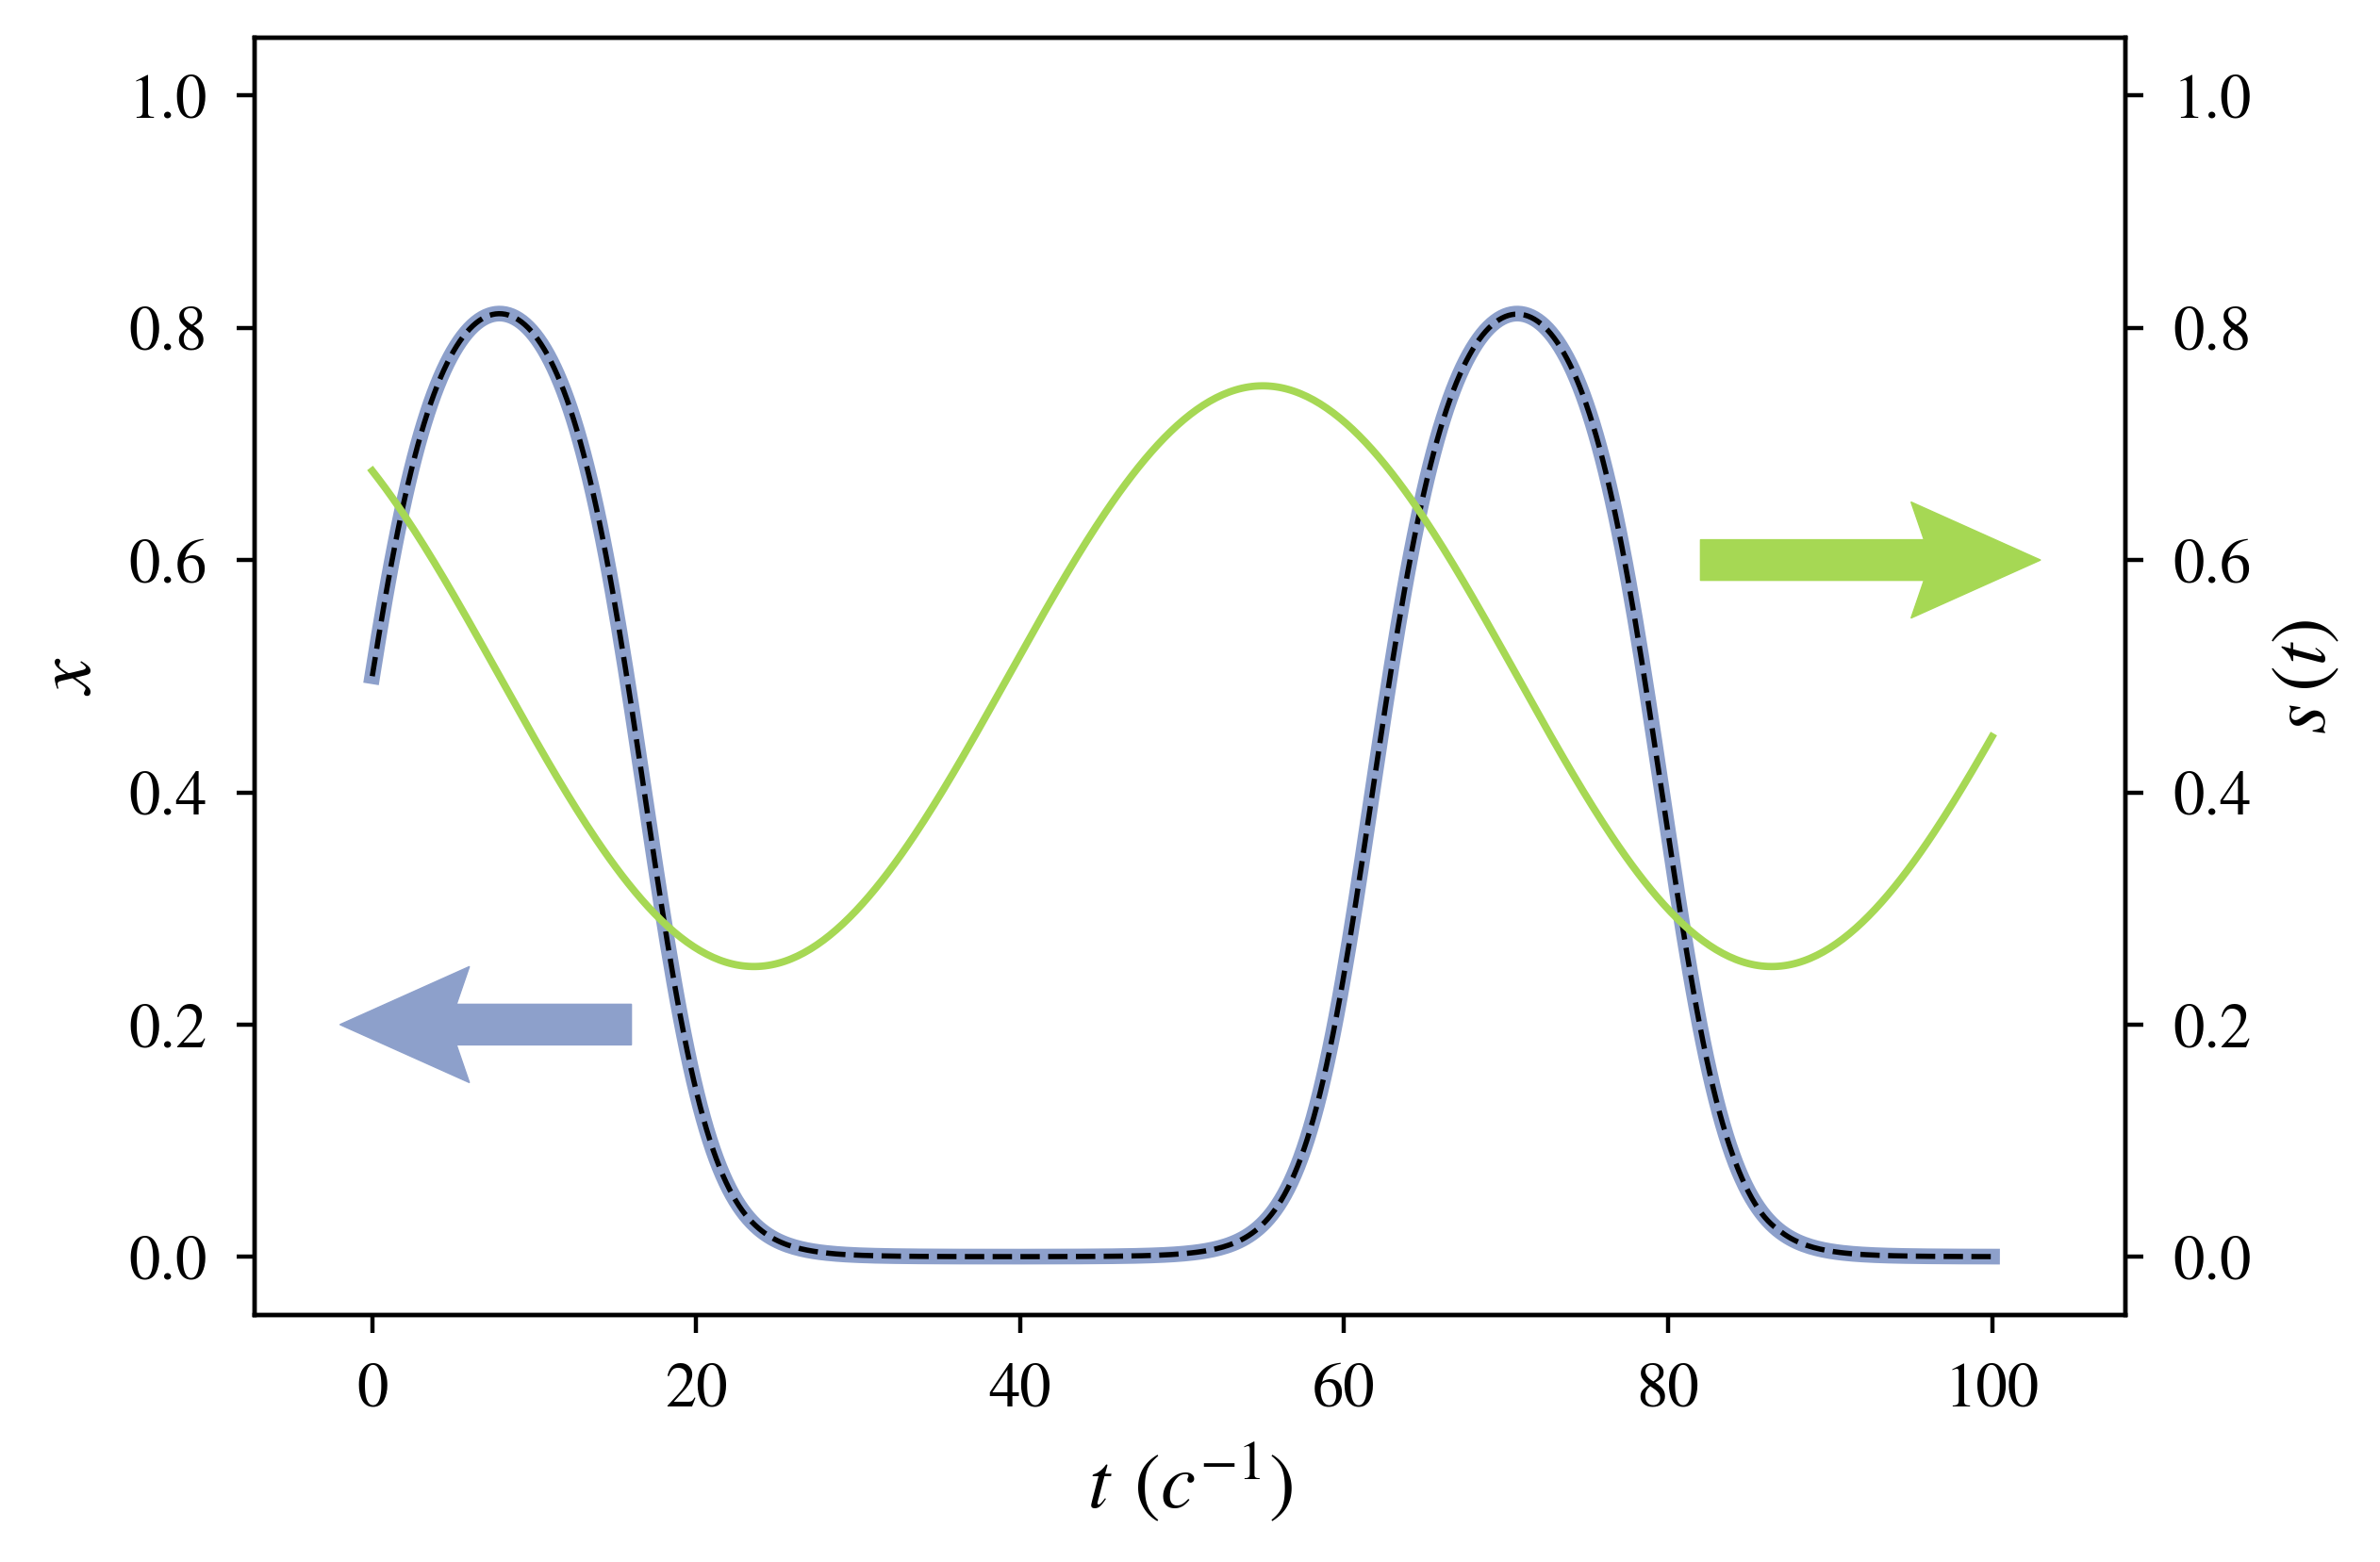

In [276]:
x0 = 0.5
a0 = 1
b,d = 0.5,1/10
ph=np.pi/4

def s_t(t):
    return 0.5 + (b/2)*np.cos(t*d+ph)

def f(t):
    return 1/((1-x0)/x0*np.exp(-(b/d)*(np.sin(t*d+ph)-np.sin(ph)))+1)

fig, ax1 = plt.subplots()

ax1.plot(t_eval,f(t_eval),lw=3,c='#8da0cb')
solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval,method='DOP853')
ax1.plot(solution.t, solution.y[0], linestyle='--',lw=1,c='black')
ax1.set_xlabel('$t\:\:(c^{-1})$')
ax1.set_ylabel('$x$')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax1.arrow(x=16,y=0.2, dx=-10,dy=0,edgecolor='#8da0cb',facecolor='#8da0cb', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.arrow(x=82,y=0.6 , dx=13 ,dy=0,edgecolor='#a6d854',facecolor='#a6d854', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.plot(t_eval,s_t(t_eval),c='#a6d854')
ax2.set_ylabel('$s\:(t)$')
ax1.set_ylim(-0.05,1.05)
ax2.set_ylim(-0.05,1.05)
plt.show()

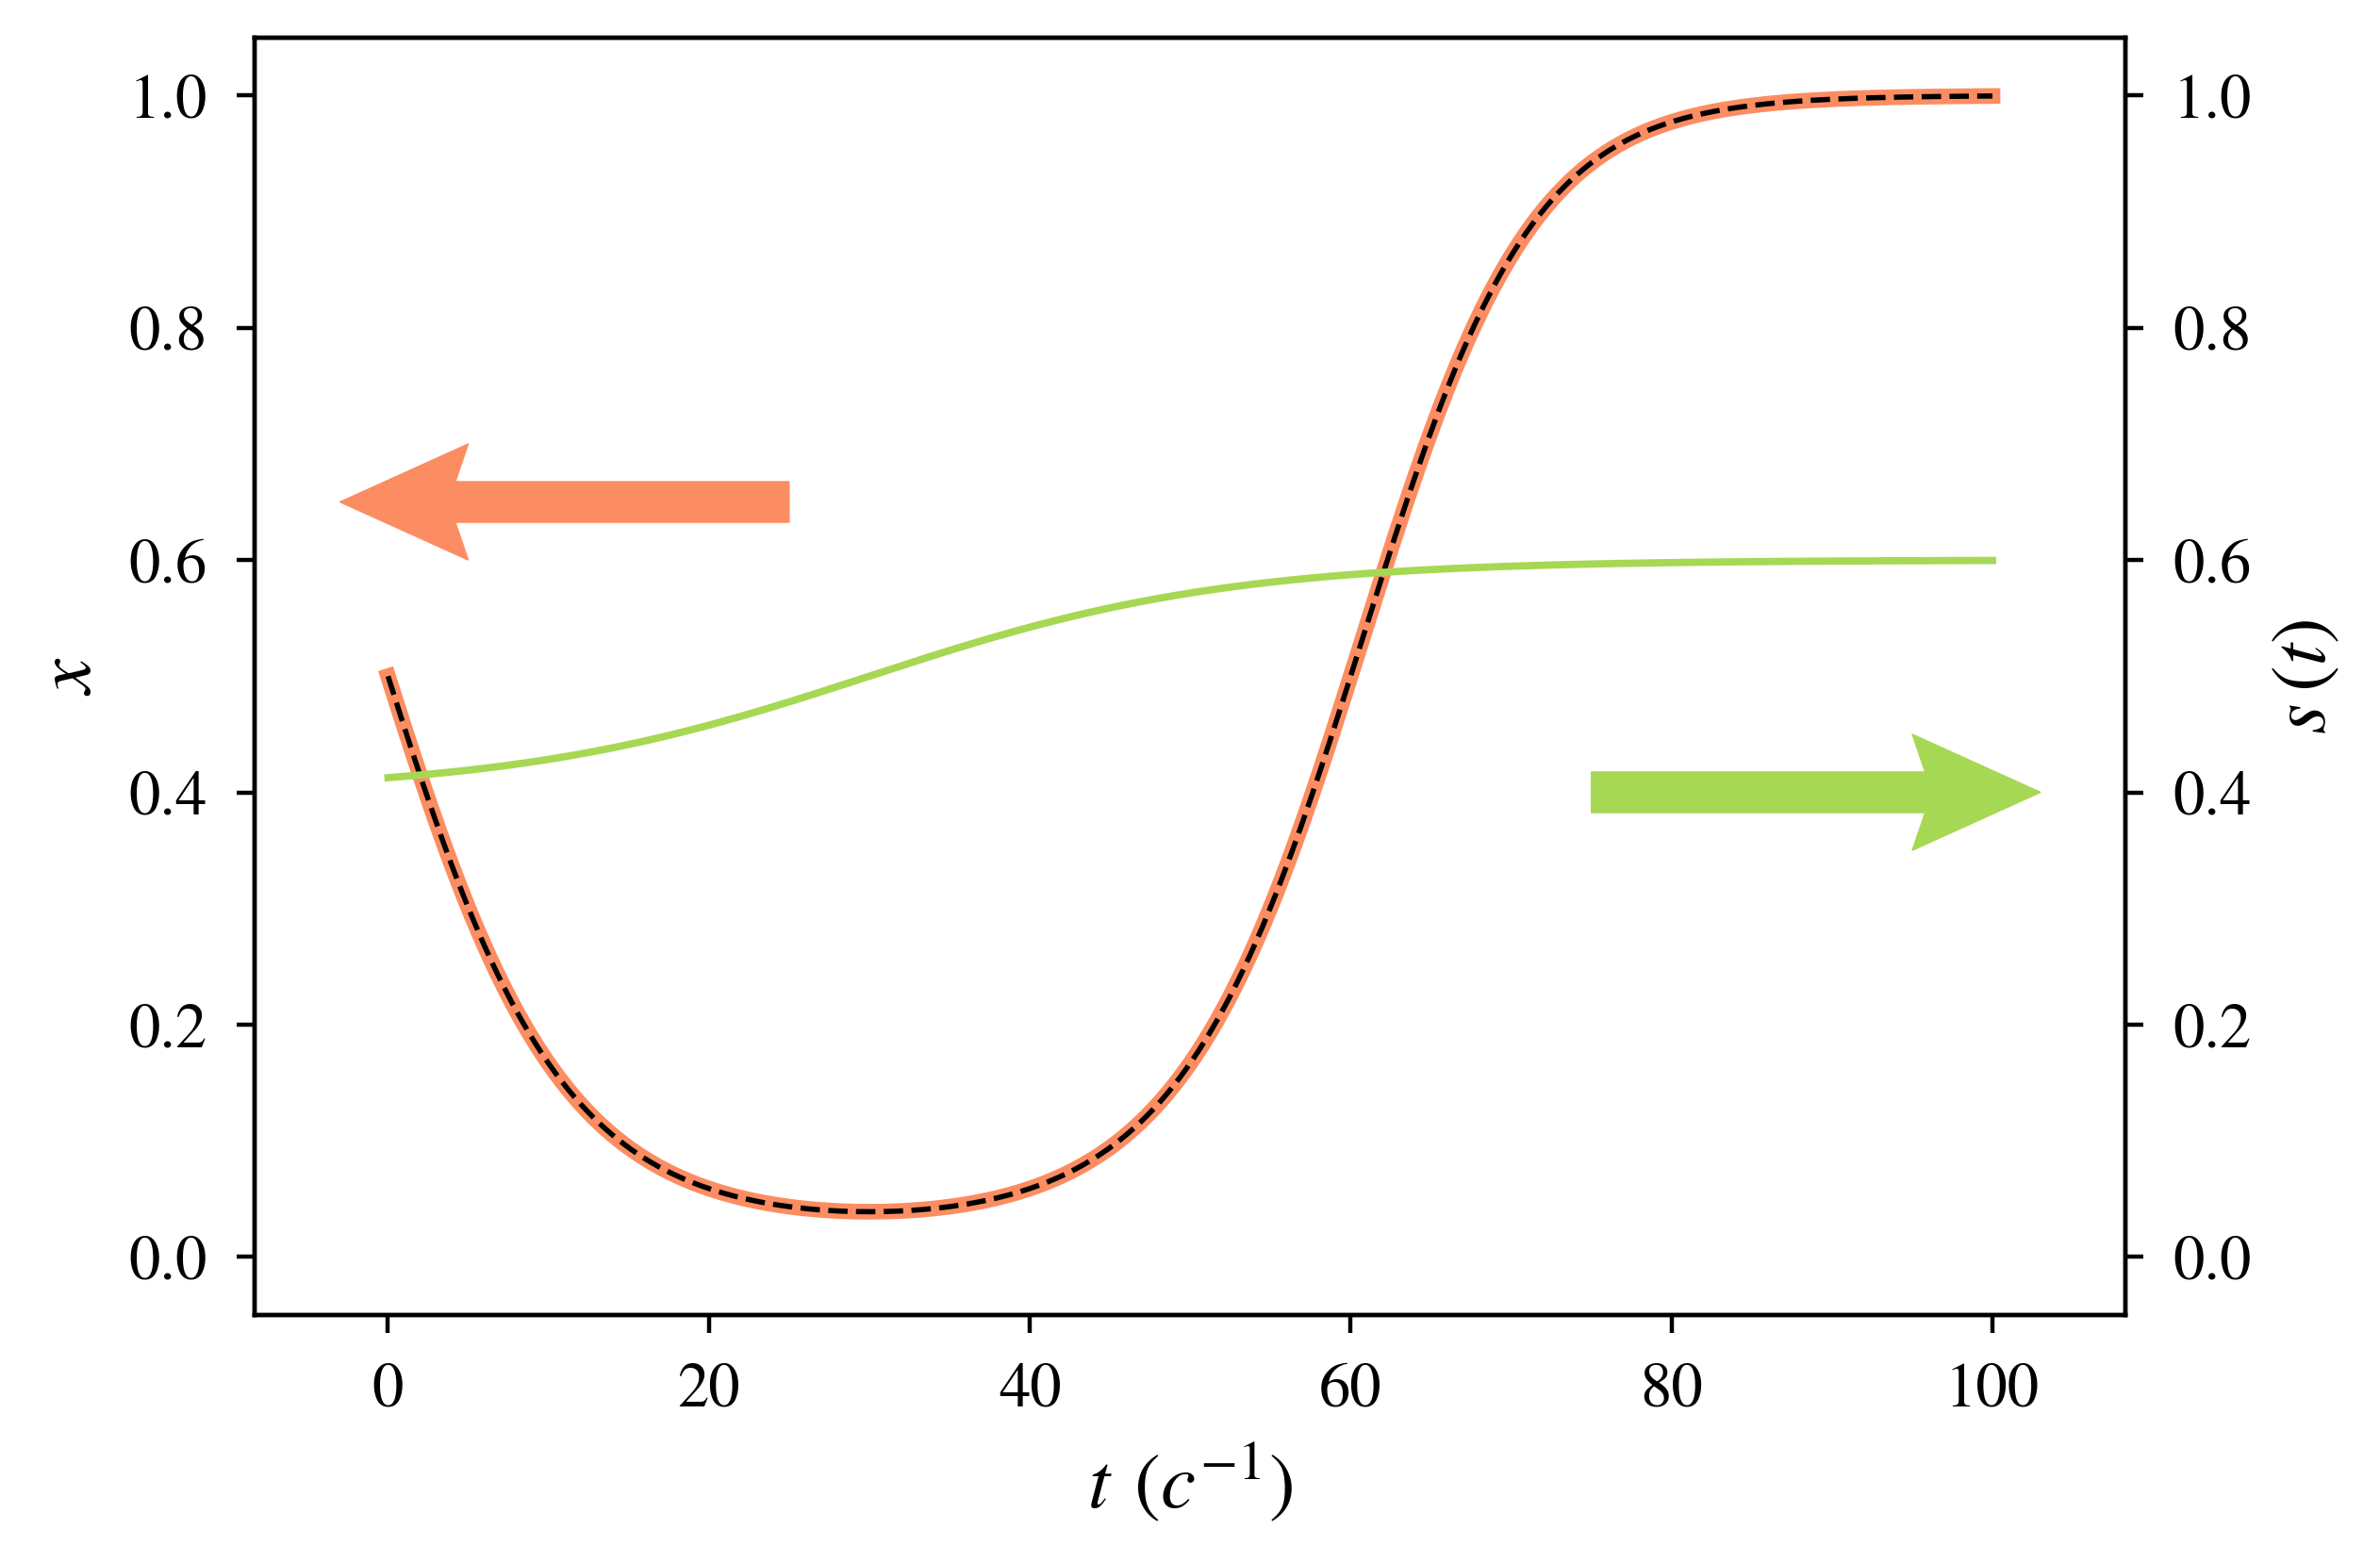

In [279]:
t_change =30
x0 = 0.5
k = 0.09
s0,s1 = 0.4,0.6
a0 = 1

def s_t(t):
    return (s1-s0)/(1+np.exp(-k*(t-t_change)))+s0

def f(t):
    term1=(1+np.exp(-k*(t-t_change)))/(1+np.exp(k*t_change))
    return 1/((1-x0)/x0*np.exp(-(2*s1-1)*t)*(term1)**(-2*(s1-s0)/k)+1)

fig, ax1 = plt.subplots()

ax1.plot(t_eval,f(t_eval),lw=3,c='#fc8d62')
solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval,method='DOP853')
ax1.plot(solution.t, solution.y[0], linestyle='--',lw=1,c='black')
ax1.set_xlabel('$t\:\:(c^{-1})$')
ax1.set_ylabel('$x$')
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax1.arrow(x=25,y=0.65, dx=-20,dy=0,edgecolor='#fc8d62',facecolor='#fc8d62', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.arrow(x=75,y=0.4 , dx=20 ,dy=0,edgecolor='#a6d854',facecolor='#a6d854', width=0.035,head_length=8, head_width=0.1, overhang=0.1)
ax2.plot(t_eval,s_t(t_eval),c='#a6d854')
ax2.set_ylabel('$s\:(t)$')
ax1.set_ylim(-0.05,1.05)
ax2.set_ylim(-0.05,1.05)
plt.show()

In [280]:
def time_dep_shift2(t,x):
	return s0*x**a_t(t)*(1-x)-(1-s0)*(1-x)**a_t(t)*x

C:\Users\cisco\AppData\Local\Temp\ipykernel_42180\824930463.py:2: RuntimeWarning: invalid value encountered in power
  return s0*x**a_t(t)*(1-x)-(1-s0)*(1-x)**a_t(t)*x


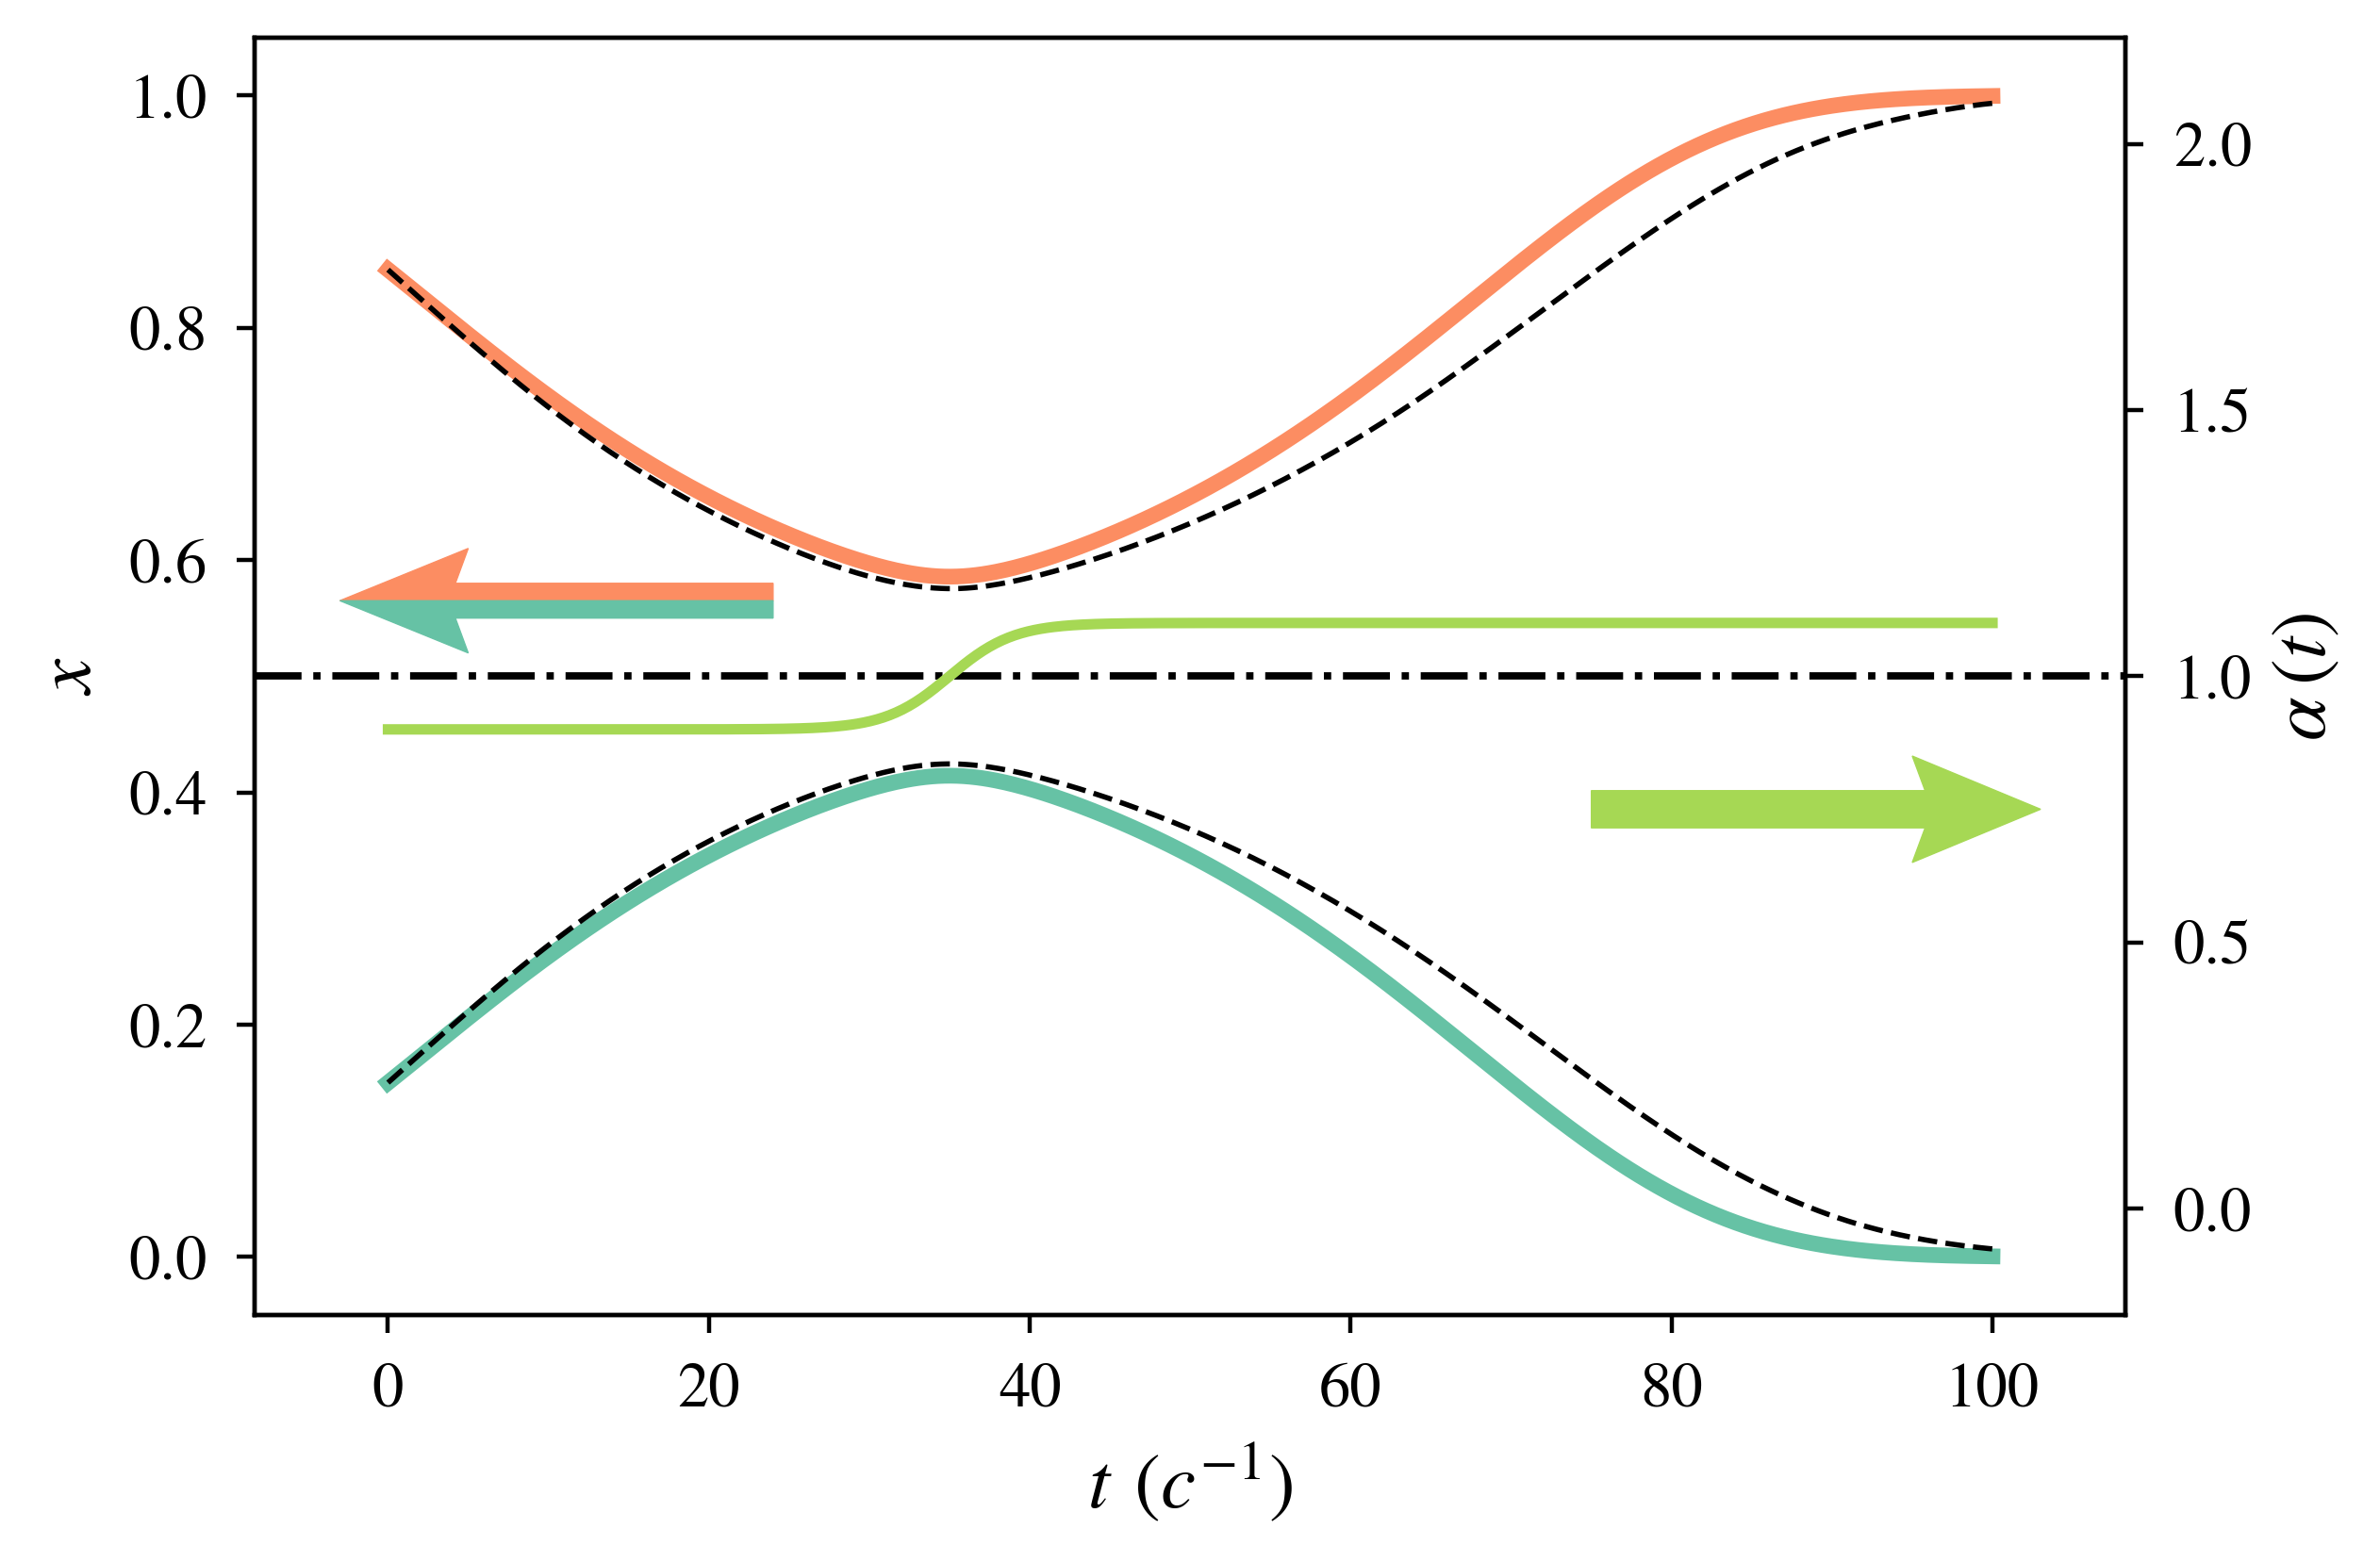

In [316]:
t_change =35
x0_vec = 0.15,0.85
k = 0.5
a0,a1 = 0.9,1.1
s0 = 0.5

def a_t(t):
    return (a1-a0)/(1+np.exp(-k*(t-t_change)))+a0

def f(t):
    term1=((1+np.exp(-k*(t-t_change)))/(1+np.exp(k*t_change)))**((a1-a0)/(2*k))
    return 1/(1+np.exp(-(np.log(x0/(1-x0)))*term1*np.exp((a1-1)*t/2)))

fig, ax1 = plt.subplots()
for x0 in x0_vec:
    color = colours[x0_vec.index(x0)]
    ax1.plot(t_eval,f(t_eval), c=color,lw=3)
    solution = solve_ivp(time_dep_shift2, t_span, [x0], t_eval=t_eval,method='DOP853')
    ax1.plot(solution.t, solution.y[0], linestyle='--',lw=1,c='black')

ax1.axhline(y=0.5,xmin=0,xmax=100, linestyle='dashdot',c='black')
ax1.set_xlabel('$t\:\:(c^{-1})$')
ax1.set_ylabel('$x$')
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax1.arrow(x=24,y=0.565, dx=-19,dy=0,edgecolor='#fc8d62',facecolor='#fc8d62', width=0.03,head_length=8, head_width=0.09, overhang=0.1,shape='left')
ax1.arrow(x=24,y=0.565, dx=-19,dy=0,edgecolor='#66c2a5',facecolor='#66c2a5', width=0.03,head_length=8, head_width=0.09, overhang=0.1,shape='right')
ax2.arrow(x=75,y=0.75 , dx=20 ,dy=0,edgecolor='#a6d854',facecolor='#a6d854', width=0.07 ,head_length=8, head_width=0.2, overhang=0.1)
ax2.plot(t_eval,a_t(t_eval),c='#a6d854', lw=2)
ax2.set_ylabel('$\\alpha\:(t)$')
ax2.set_ylim(-0.2,2.2)
ax1.set_ylim(-0.05,1.05)
plt.show()

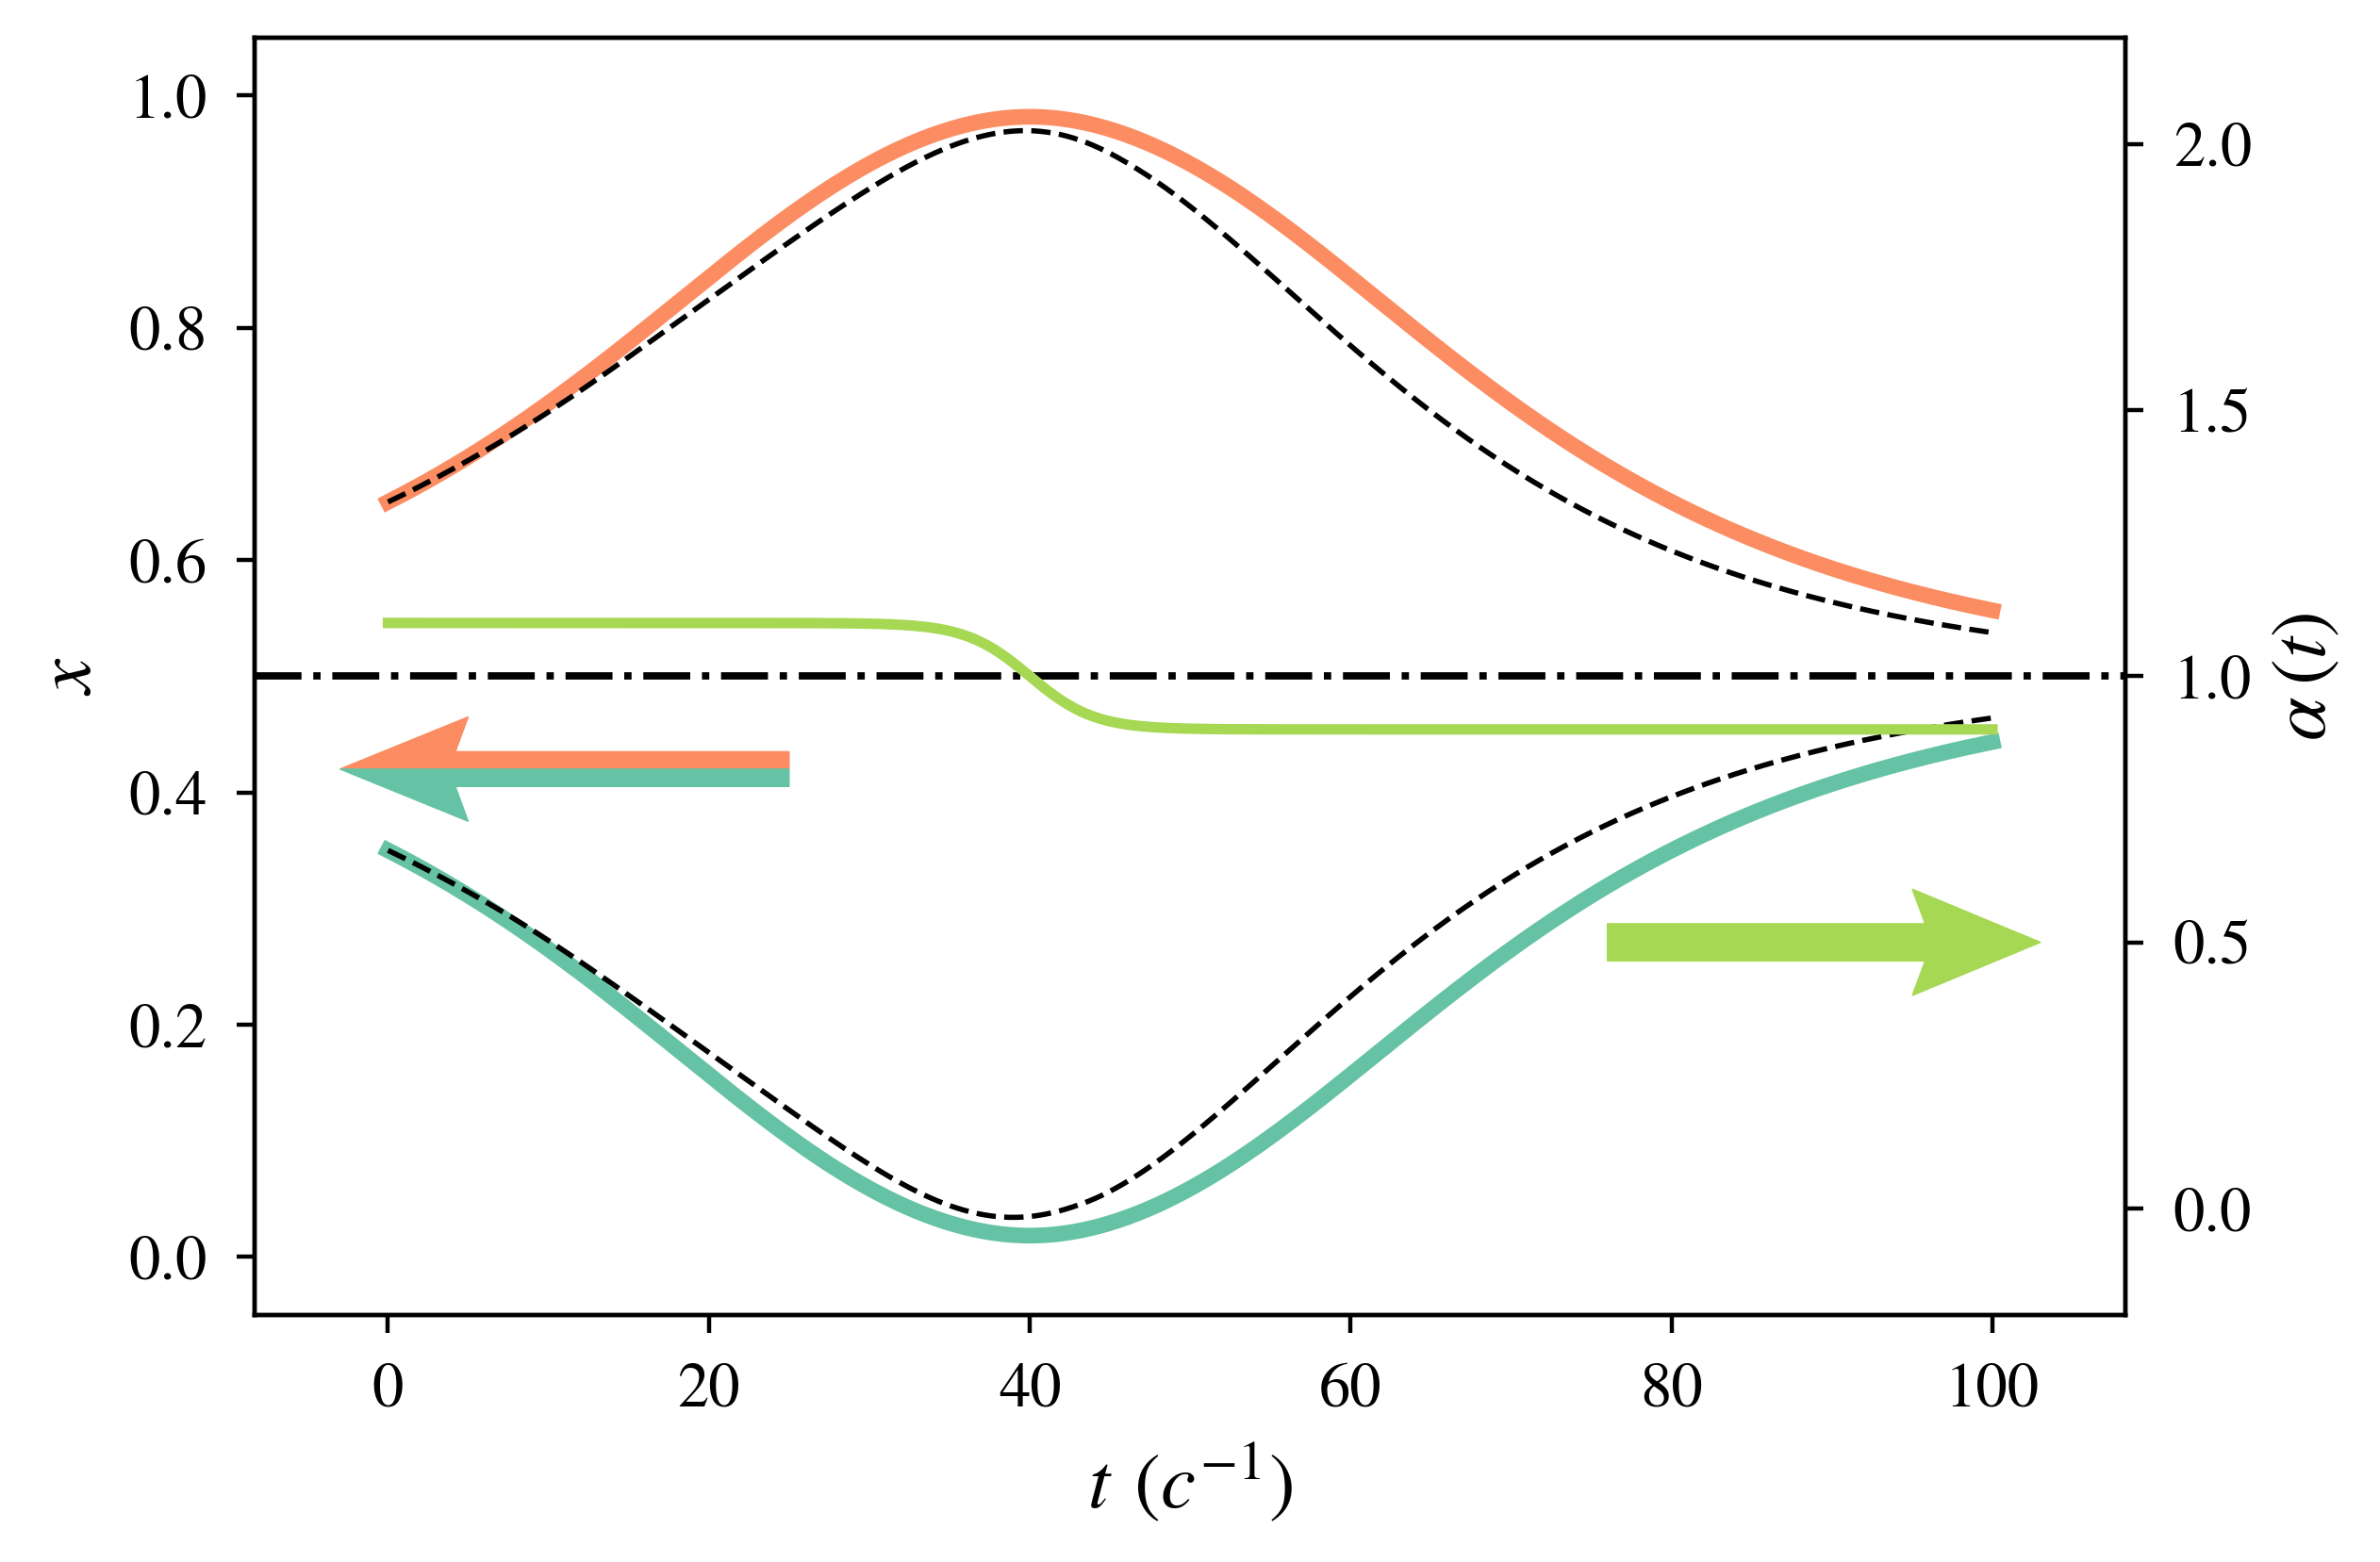

In [315]:
t_change =40
x0_vec = 0.35,0.65
k = 0.5
a0,a1 = 1.1,0.9
s0 = 0.5

def a_t(t):
    return (a1-a0)/(1+np.exp(-k*(t-t_change)))+a0

def f(t):
    term1=((1+np.exp(-k*(t-t_change)))/(1+np.exp(k*t_change)))**((a1-a0)/(2*k))
    return 1/(1+np.exp(-(np.log(x0/(1-x0)))*term1*np.exp((a1-1)*t/2)))
fig, ax1 = plt.subplots()
for x0 in x0_vec:
    color = colours[x0_vec.index(x0)]
    ax1.plot(t_eval,f(t_eval), c=color,lw=3)
    solution = solve_ivp(time_dep_shift2, t_span, [x0], t_eval=t_eval,method='DOP853')
    ax1.plot(solution.t, solution.y[0], linestyle='--',lw=1,c='black')

ax1.axhline(y=0.5,xmin=0,xmax=100, linestyle='dashdot',c='black')
ax1.set_xlabel('$t\:\:(c^{-1})$')
ax1.set_ylabel('$x$')
ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax1.arrow(x=25,y=0.42, dx=-20,dy=0,edgecolor='#fc8d62',facecolor='#fc8d62', width=0.03,head_length=8, head_width=0.09, overhang=0.1,shape='left')
ax1.arrow(x=25,y=0.42, dx=-20,dy=0,edgecolor='#66c2a5',facecolor='#66c2a5', width=0.03,head_length=8, head_width=0.09, overhang=0.1,shape='right')
ax2.arrow(x=76,y=0.5 , dx=19 ,dy=0,edgecolor='#a6d854',facecolor='#a6d854', width=0.07 ,head_length=8, head_width=0.2, overhang=0.1)
ax2.plot(t_eval,a_t(t_eval),c='#a6d854',lw=2)
ax2.set_ylim(-0.2,2.2)
ax2.set_ylabel('$\\alpha\:(t)$')
ax1.set_ylim(-0.05,1.05)
plt.show()